# Module Dependency

In [1]:
%matplotlib inline

import numpy as np
import skimage as ski
from skimage import exposure, io
from skimage.morphology import disk, square
from skimage.filters import rank, median, gaussian
from skimage.color import rgb2hsv, hsv2rgb, rgb2gray, gray2rgb
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20.0, 16.0)

# Read Image

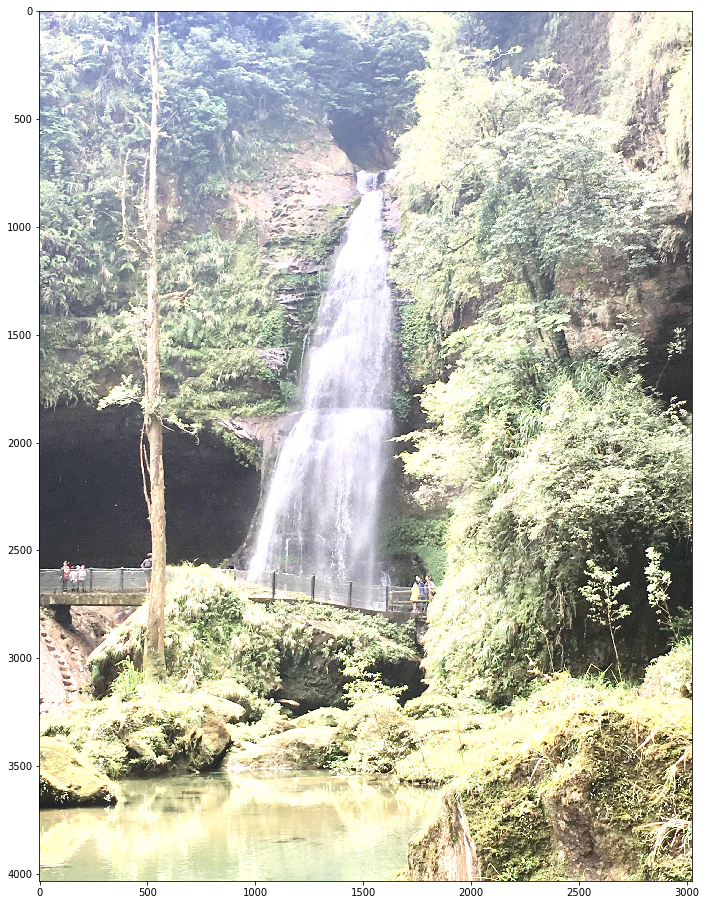

In [2]:
image = io.imread('./data/input2.bmp')
plt.imshow(image)

# Median Filter with kernel size [10, 10]

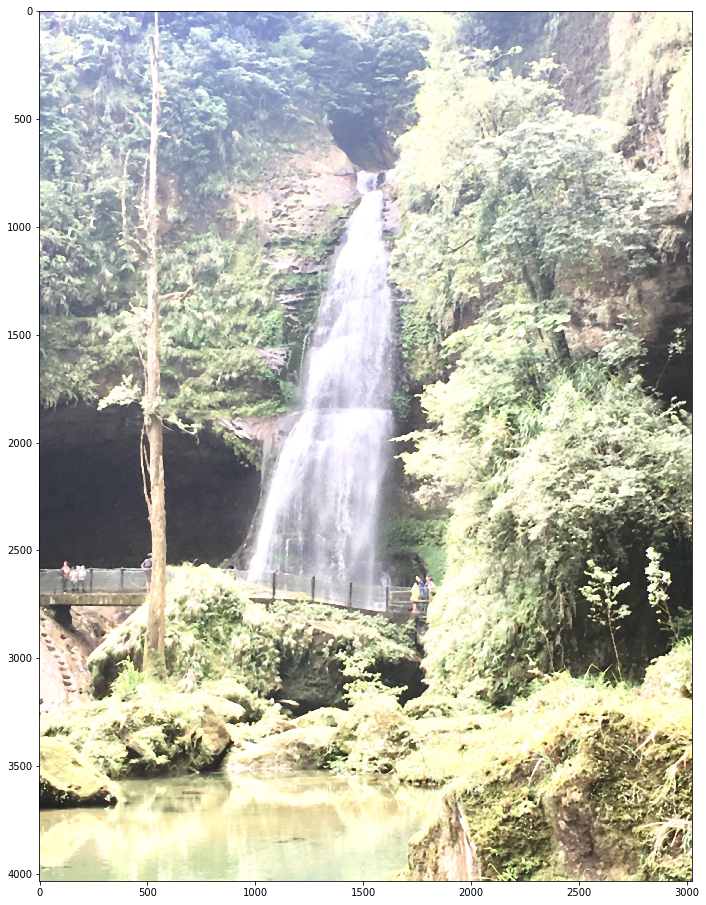

In [3]:
for i in range(3):
    image[:, :, i] = median(image[:, :, i], square(10))
plt.imshow(image)

# Plot RGB Distribution

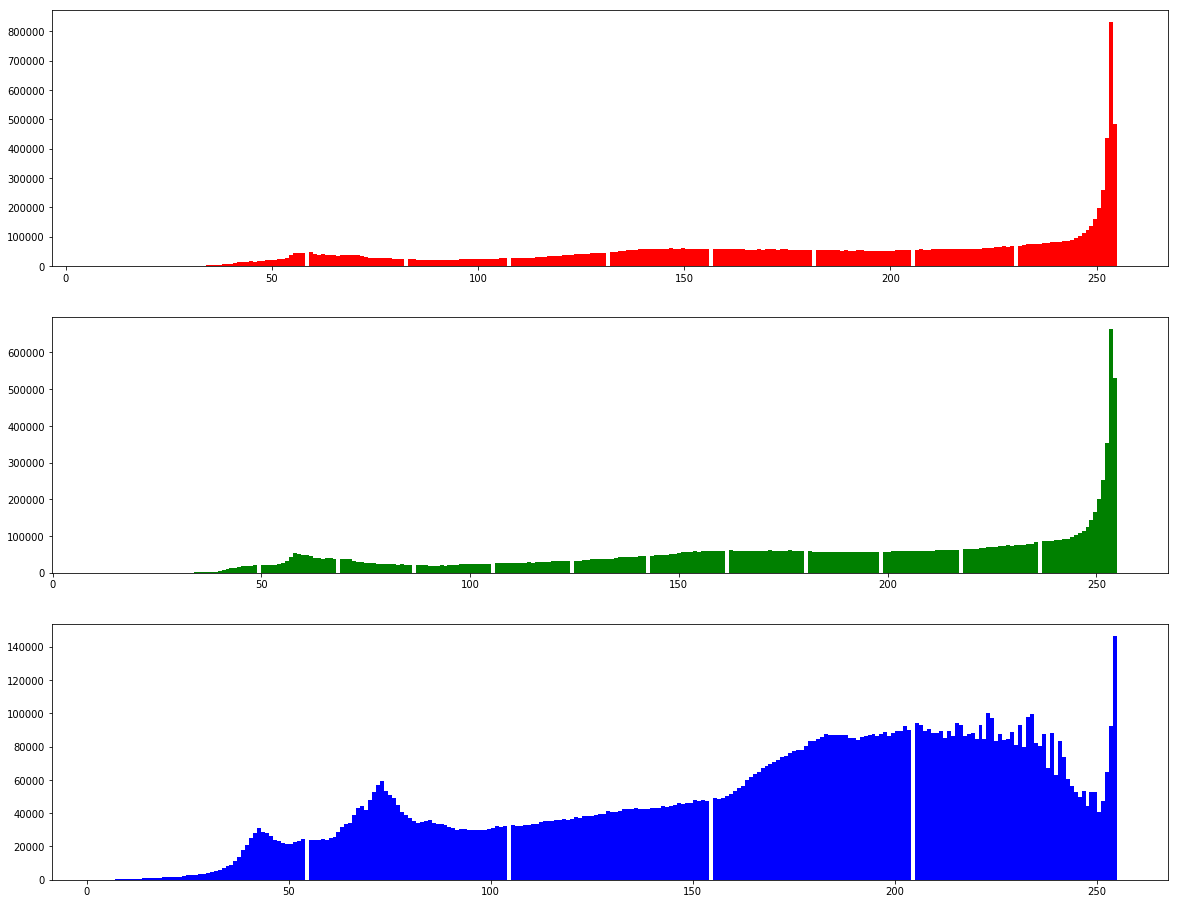

In [4]:
f, axarr = plt.subplots(3)
axarr[0].hist(image[:, :, 0].ravel(), bins=256, color='r')
axarr[1].hist(image[:, :, 1].ravel(), bins=256, color='g')
axarr[2].hist(image[:, :, 2].ravel(), bins=256, color='b')
plt.show()

# Replace V Channel with Blue Channel/255

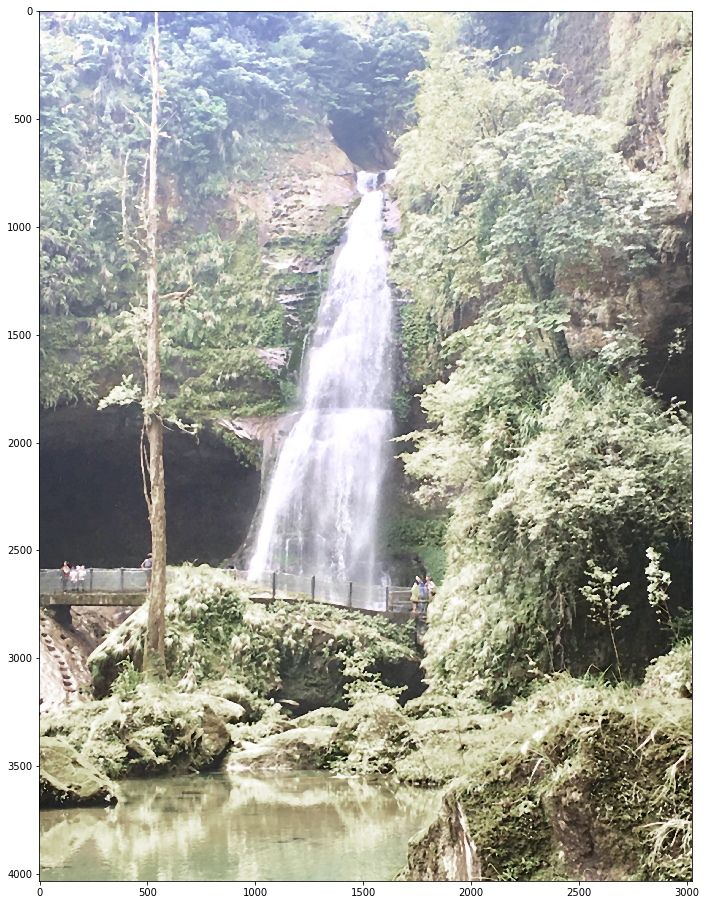

In [5]:
image_hsv = rgb2hsv(image)
# image_hsv[:, :, 2] = exposure.equalize_hist(image[:, :, 2])
image_hsv[:, :, 2] = image[:, :, 2]/255
image = hsv2rgb(image_hsv)
plt.imshow(image)

# Perform Global Histogram Equalization and Show V Channel Histogram

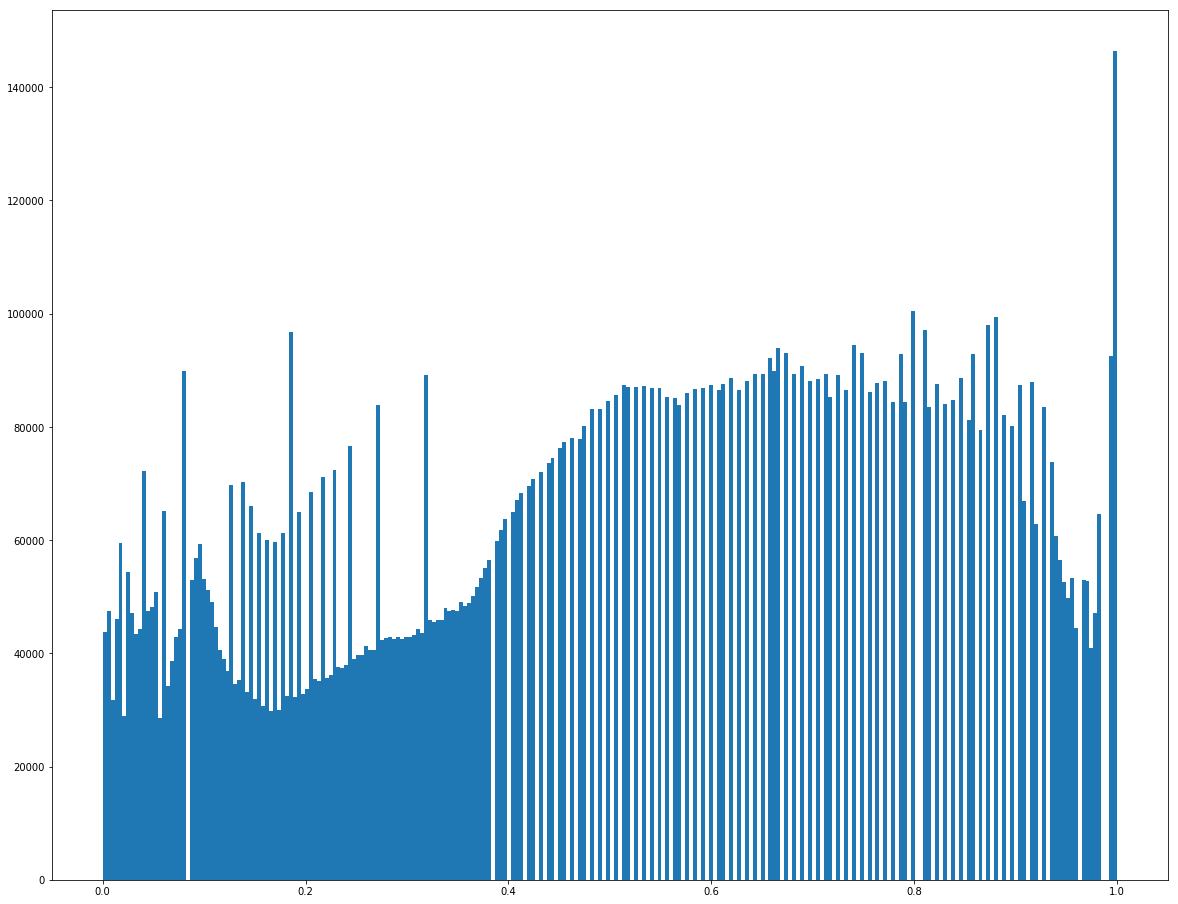

In [6]:
image_hsv = rgb2hsv(image)
image_hsv[:, :, 2] = exposure.equalize_hist(image_hsv[:, :, 2])
plt.hist(image_hsv[:, :, 2].ravel(), bins=256)
plt.show()

# Add some Saturation

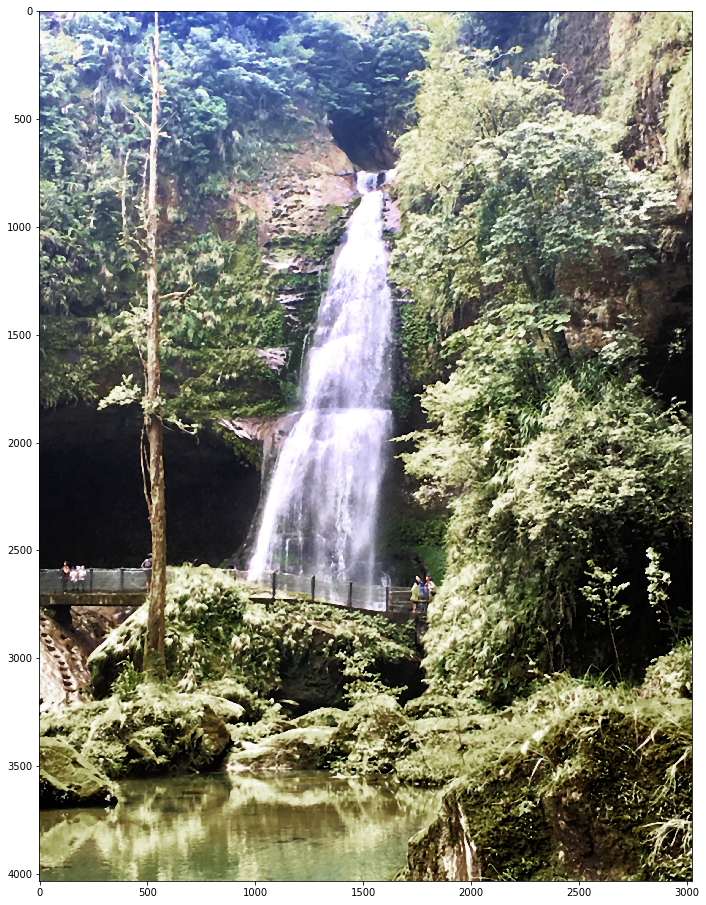

In [7]:
image_hsv[:, :, 1] *= 2
image_hsv[:, :, 1][image_hsv[:, :, 1] > 1] = 1
image = hsv2rgb(image_hsv)
plt.imshow(image)

# Rescale Intensity to Increase Constrast

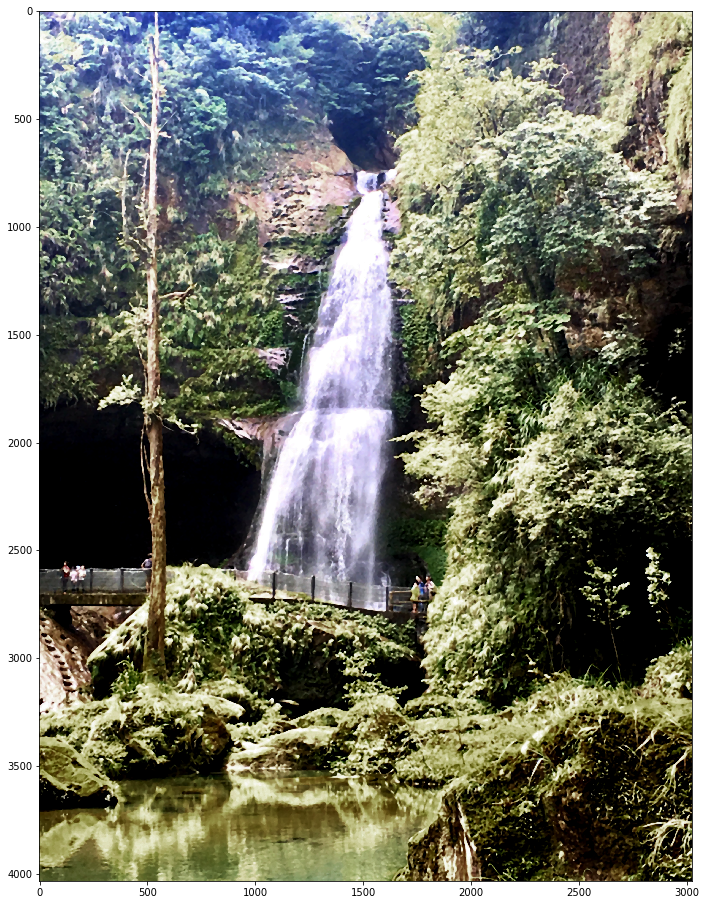

In [8]:
# image[:, :, 0] = exposure.rescale_intensity(image[:, :, 0], in_range=(55, 255))
for i in range(3):
    image[:, :, i] = exposure.rescale_intensity(image[:, :, i], in_range=(0.1, 1))
plt.imshow(image)

# Write Image

In [9]:
io.imsave('./data/output2.bmp', image)

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
